In [23]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
from preprocess_ecg_data import load_ecg_data
from scipy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt

ECG_LEN = 65536
ECG_WINDOW = 2000
F_SAMPLING = 128

PATH = './ECGData.mat'

### Data preprocessing


In [2]:
# Mapping of labels: 
#   1:ARR (Arrhythmia)
#   2:CHF (Congestive heart failure)
#   3:NSR (Normal sinus rhythm)

ecg_data = load_ecg_data()

df_ecg_data = pd.DataFrame(ecg_data)
df_ecg_data 

,ecg_data,class,sampled_from,n_chunk
0,"[-0.09785730141312626, -0.15688125766870917, -...",1,1,1
1,"[-0.3484112418649029, -0.02274587725720959, 0....",1,1,2
2,"[-0.4360649375168176, -0.4460280919950408, -0....",1,1,3
3,"[-0.38340009514361517, -0.38383578522187806, -...",1,1,4
4,"[-0.3231552247831461, -0.3163997523002529, -0....",1,1,5
...,...,...,...,...
5179,"[-0.265, -0.265, -0.265, -0.185, -0.085, 0.275...",3,36,28
5180,"[0.065, 0.055, 0.135, 0.225, 0.275, 0.325, 0.3...",3,36,29
5181,"[-0.345, -0.365, -0.355, -0.355, -0.375, -0.34...",3,36,30
5182,"[-0.005, 0.035, -0.045, 0.045, 0.015, -0.035, ...",3,36,31


We are going to visualize one ECG from our dataset. First we are going to create a sample array. Since we know that the sample frequency was 128 hertz, we can create an array of length 2000 with 1/128 intervals.

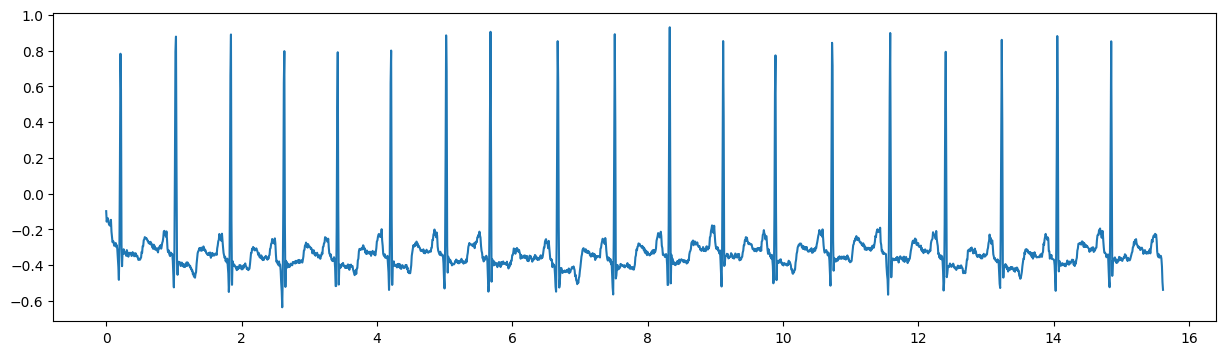

In [28]:
values = np.arange(0, ECG_WINDOW * 1/F_SAMPLING, 1/F_SAMPLING)
plt.figure(figsize=(15, 4))
plt.plot(values, df_ecg_data['ecg_data'][0])

### __Task 1: Measuring the Heart rate from ECG signals.__

For this task take only ECG samples number 1 and 36 with the label NSR (normal sinus rhythm). For each of the two ECG examples divide the signal into windows of 2000 samples without overlapping. The remaining samples at the end of the file can be discarded.

In [3]:
# Taking the sample 1 and 36 from the NSR
df_ex1 = df_ecg_data[(df_ecg_data['class'] == 3) & ((df_ecg_data['sampled_from'] == 1) | (df_ecg_data['sampled_from'] == 36))]
df_ex1


,ecg_data,class,sampled_from,n_chunk
4032,"[-0.165, -0.155, -0.195, -0.205, -0.185, -0.15...",3,1,1
4033,"[-0.175, -0.175, -0.175, -0.175, -0.215, -0.18...",3,1,2
4034,"[2.235, 2.705, 2.525, 1.205, -0.255, -0.405, -...",3,1,3
4035,"[-0.095, -0.105, -0.115, -0.105, -0.095, -0.08...",3,1,4
4036,"[-0.125, -0.145, -0.165, -0.125, -0.065, -0.10...",3,1,5
...,...,...,...,...
5179,"[-0.265, -0.265, -0.265, -0.185, -0.085, 0.275...",3,36,28
5180,"[0.065, 0.055, 0.135, 0.225, 0.275, 0.325, 0.3...",3,36,29
5181,"[-0.345, -0.365, -0.355, -0.355, -0.375, -0.34...",3,36,30
5182,"[-0.005, 0.035, -0.045, 0.045, 0.015, -0.035, ...",3,36,31


The goal is to obtain the average heart rate for each of the windows considered using for this the analysis of the FFT (Fast Fourier Transform).
We can assume that each ECG sample is provided by two different persons. Therefore, plot an histogram for the average heart rate of the windows for each ECG separately.
Include an analysis of your method and comment your results.

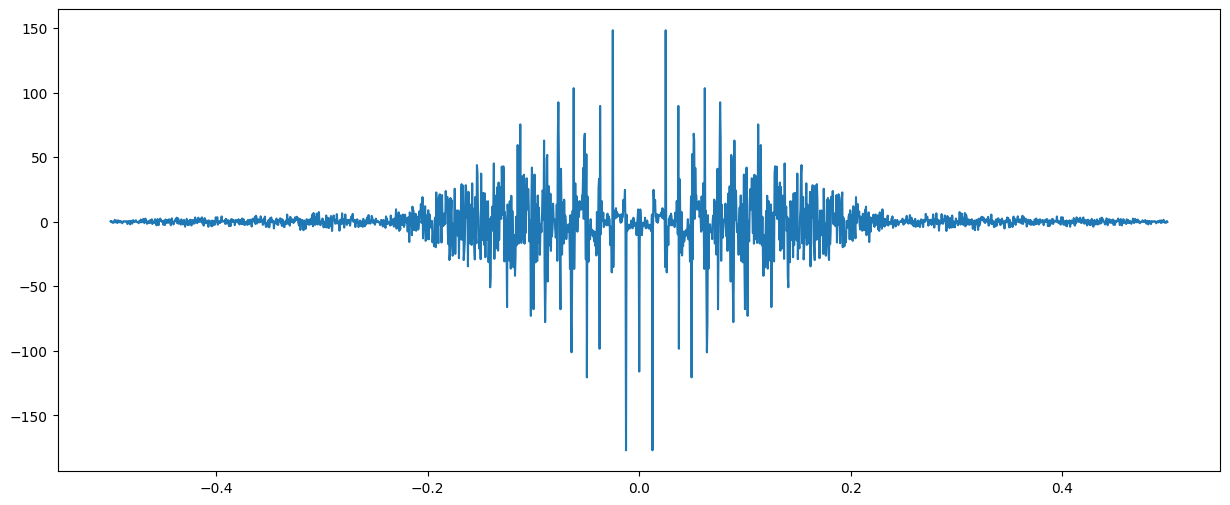

In [21]:
ft = df_ex1['ecg_data'].apply(lambda x: fftshift(fft(x)))
freq = df_ex1['ecg_data'].apply(lambda x: fftshift(fftfreq(x.shape[-1])))

sample = np.array(ft)[0].real
freq = np.array(freq)[0]

plt.figure(figsize=(15, 6))
plt.plot(freq, sample)